## Group No: 17

## Group Member Names:
1. Debarati Banerjee
2. Mrutyunjay Shukla
3. Tiasa Mukherjee
4. Rahul Kundu

# 1. Import the required libraries

In [ ]:
##---------Type the code below this line------------------##
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import time
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD

# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [ ]:
##---------Type the code below this line------------------##
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

from google.colab import drive
drive.mount('/content/drive')

train_folder = '/content/drive/My Drive/data/train'
validation_folder = '/content/drive/My Drive/data/validation'
test_folder = '/content/drive/My Drive/data/test'  #path for test dataset


train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


validation_generator = validation_datagen.flow_from_directory(
    validation_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Mounted at /content/drive
Found 1003 images belonging to 2 classes.
Found 1003 images belonging to 2 classes.
Found 1078 images belonging to 2 classes.


## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [ ]:
##---------Type the code below this line------------------##
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

from google.colab import drive
drive.mount('/content/drive')

train_folder = '/content/drive/My Drive/data/train'
validation_folder = '/content/drive/My Drive/data/validation'
test_folder = '/content/drive/My Drive/data/test'  #path for test dataset


train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


validation_generator = validation_datagen.flow_from_directory(
    validation_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

##Also removed duplicate data and inconsistent files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1003 images belonging to 2 classes.
Found 1003 images belonging to 2 classes.
Found 1078 images belonging to 2 classes.


## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [ ]:
##---------Type the code below this line------------------##taken subset of dataset as data upload is taking a lot of time
# Retrieve data and labels from the generators
train_data, train_labels = next(train_generator)
validation_data, validation_labels = next(validation_generator)
test_data, test_labels = next(test_generator)

# Perform Label Encoding if the labels are categorical
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
validation_labels_encoded = label_encoder.transform(validation_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Perform One-Hot Encoding if needed (for categorical labels)
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_labels_encoded.reshape(-1, 1))
validation_labels_one_hot = one_hot_encoder.transform(validation_labels_encoded.reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_labels_encoded.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 3.3 Split the data into training set and testing set

In [ ]:
##---------Type the code below this line------------------##
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

from google.colab import drive
drive.mount('/content/drive')

train_folder = '/content/drive/My Drive/data/train'
validation_folder = '/content/drive/My Drive/data/validation'
test_folder = '/content/drive/My Drive/data/test'  #path for test dataset

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


validation_generator = validation_datagen.flow_from_directory(
    validation_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1003 images belonging to 2 classes.
Found 1003 images belonging to 2 classes.
Found 1078 images belonging to 2 classes.


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [ ]:
##---------Type the answer below this line------------------##
##Duplicate image files are removed from the test, validation and train folders
##Missing data is also handled
##Inconsistent files are also removed
##The normalization technique used is called "Min-Max scaling"
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

##Data encoding is also done for categorical data
  # Retrieve data and labels from the generators
train_data, train_labels = next(train_generator)
validation_data, validation_labels = next(validation_generator)
test_data, test_labels = next(test_generator)

  # Perform Label Encoding if the labels are categorical
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
validation_labels_encoded = label_encoder.transform(validation_labels)
test_labels_encoded = label_encoder.transform(test_labels)

  # Perform One-Hot Encoding if needed (for categorical labels)
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_labels_encoded.reshape(-1, 1))
validation_labels_one_hot = one_hot_encoder.transform(validation_labels_encoded.reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_labels_encoded.reshape(-1, 1))



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [ ]:
##---------Type the code below this line------------------##
# Create the model
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model on validation data
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
32/32 [==============================] - 239s 8s/step - loss: 5.7277 - accuracy: 0.4915 - val_loss: 0.9845 - val_accuracy: 0.4945
Epoch 2/10
32/32 [==============================] - 8s 264ms/step - loss: 1.3601 - accuracy: 0.5214 - val_loss: 1.0760 - val_accuracy: 0.5025
Epoch 3/10
32/32 [==============================] - 8s 237ms/step - loss: 2.3786 - accuracy: 0.4776 - val_loss: 1.1430 - val_accuracy: 0.5165
Epoch 4/10
32/32 [==============================] - 9s 281ms/step - loss: 0.7163 - accuracy: 0.6311 - val_loss: 0.8074 - val_accuracy: 0.5254
Epoch 5/10
32/32 [==============================] - 10s 302ms/step - loss: 0.7638 - accuracy: 0.6211 - val_loss: 1.1434 - val_accuracy: 0.5244
Epoch 6/10
32/32 [==============================] - 8s 236ms/step - loss: 0.7418 - accuracy: 0.6092 - val_loss: 0.9360 - val_accuracy: 0.5234
Epoch 7/10
32/32 [==============================] - 8s 260ms/step - loss: 0.8350 - accuracy: 0.5882 - val_loss: 0.9223 - val_accuracy: 0.5234
Epoch 

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [ ]:
##---------Type the answer below this line------------------##
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
'''
PFB the requested information:

Number of Layers:
There are three dense (fully connected) layers in this model:

Flatten Layer: This layer doesn't involve any trainable parameters. It's a preparatory layer that transforms the input data into a flat array before feeding it into the subsequent dense layers.

Dense Layer (128 units): This layer has 128 units with ReLU activation.

Dense Layer (64 units): This layer has 64 units with ReLU activation.

Output Layer (1 unit): This layer has 1 unit with a sigmoid activation function. It's the output layer for binary classification.

Number of Units in Each Layer:
Flatten Layer: It doesn't contain any units.
Dense Layer (128 units): 128 units with ReLU activation.
Dense Layer (64 units): 64 units with ReLU activation.
Output Layer (1 unit): 1 unit with a sigmoid activation function.
Total Number of Trainable Parameters:
To calculate the total number of trainable parameters in the model, consider the parameters associated with each layer:

Flatten Layer: This layer doesn't have any trainable parameters.

Dense Layer (128 units):

Each unit in this layer has connections from the previous layer (Flatten layer) along with a bias term.
Total parameters = (Input size * Number of units) + Number of units (bias terms)
Input size to this layer is 150 * 150 * 3 (result of the Flatten layer)
Total parameters = (150 * 150 * 3 * 128) + 128 = 576,128
Dense Layer (64 units):

Similar calculation as the previous dense layer but with different input size (number of units from the previous layer)
Total parameters = (Number of units in previous layer * Number of units in this layer) + Number of units (bias terms)
Total parameters = (128 * 64) + 64 = 8,256
Output Layer (1 unit):

Similar calculation as the previous dense layer but with different input size (number of units from the previous layer)
Total parameters = (Number of units in previous layer * Number of units in this layer) + Number of units (bias terms)
Total parameters = (64 * 1) + 1 = 65
Justification:
The calculation of trainable parameters involves the weights connecting the layers along with the bias terms. These parameters are adjusted during the training process to optimize the model's performance. The architecture of the neural network and the number of parameters play a significant role in model complexity, affecting the model's capacity to learn from the data and its potential for overfitting or underfitting.
'''

"\nPFB the requested information:\n\nNumber of Layers:\nThere are three dense (fully connected) layers in this model:\n\nFlatten Layer: This layer doesn't involve any trainable parameters. It's a preparatory layer that transforms the input data into a flat array before feeding it into the subsequent dense layers.\n\nDense Layer (128 units): This layer has 128 units with ReLU activation.\n\nDense Layer (64 units): This layer has 64 units with ReLU activation.\n\nOutput Layer (1 unit): This layer has 1 unit with a sigmoid activation function. It's the output layer for binary classification.\n\nNumber of Units in Each Layer:\nFlatten Layer: It doesn't contain any units.\nDense Layer (128 units): 128 units with ReLU activation.\nDense Layer (64 units): 64 units with ReLU activation.\nOutput Layer (1 unit): 1 unit with a sigmoid activation function.\nTotal Number of Trainable Parameters:\nTo calculate the total number of trainable parameters in the model, consider the parameters associated 

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [ ]:
##---------Type the code below this line------------------##
# Creating the model
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model with appropriate optimizer, loss, and metrics
optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model (remaining code for training remains unchanged)
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
32/32 [==============================] - 11s 323ms/step - loss: 6.3034 - accuracy: 0.5194 - val_loss: 1.7082 - val_accuracy: 0.5284
Epoch 2/10
32/32 [==============================] - 8s 240ms/step - loss: 1.7933 - accuracy: 0.5464 - val_loss: 1.3575 - val_accuracy: 0.5314
Epoch 3/10
32/32 [==============================] - 9s 277ms/step - loss: 2.2392 - accuracy: 0.5304 - val_loss: 2.0408 - val_accuracy: 0.5364
Epoch 4/10
32/32 [==============================] - 9s 274ms/step - loss: 1.4160 - accuracy: 0.6102 - val_loss: 1.7995 - val_accuracy: 0.5174
Epoch 5/10
32/32 [==============================] - 8s 240ms/step - loss: 1.0779 - accuracy: 0.6301 - val_loss: 2.5469 - val_accuracy: 0.5015
Epoch 6/10
32/32 [==============================] - 11s 355ms/step - loss: 2.4660 - accuracy: 0.5354 - val_loss: 2.9486 - val_accuracy: 0.5095
Epoch 7/10
32/32 [==============================] - 10s 315ms/step - loss: 1.1117 - accuracy: 0.6152 - val_loss: 1.9373 - val_accuracy: 0.5065
Epo

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import time
from sklearn.model_selection import KFold

# Initialize data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

# Define folder paths
train_folder = '/content/drive/My Drive/data/train'
validation_folder = '/content/drive/My Drive/data/validation'
test_folder = '/content/drive/My Drive/data/test'  # Path for test dataset

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Retrieve data and labels from the generators
train_data_array = np.concatenate([train_generator.next()[0] for _ in range(len(train_generator))])
train_labels_array = np.concatenate([train_generator.next()[1] for _ in range(len(train_generator))])
validation_data_array = np.concatenate([validation_generator.next()[0] for _ in range(len(validation_generator))])
validation_labels_array = np.concatenate([validation_generator.next()[1] for _ in range(len(validation_generator))])
test_data_array = np.concatenate([test_generator.next()[0] for _ in range(len(test_generator))])
test_labels_array = np.concatenate([test_generator.next()[1] for _ in range(len(test_generator))])

# Define the number of folds for cross-validation
num_folds = 5
# Define the number of epochs
epochs = 20

# Initialize KFold
kfold = KFold(n_splits=num_folds, shuffle=True)

# Placeholder to store total time
total_time = 0.0

# Loop over each fold
for fold, (train_idx, val_idx) in enumerate(kfold.split(train_data_array)):
    print(f'Fold {fold+1}/{num_folds}')

    train_fold_data, train_fold_labels = train_data_array[train_idx], train_labels_array[train_idx]
    val_fold_data, val_fold_labels = train_data_array[val_idx], train_labels_array[val_idx]

    # Create the model (ensure to compile it inside the loop for a new model per fold)
    model = Sequential()
    model.add(Flatten(input_shape=(150, 150, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with SGD optimizer
    optimizer = SGD(learning_rate=0.01)  # Adjust the learning rate as needed
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model and measure time taken
    start_time = time.time()
    model.fit(train_fold_data, train_fold_labels, epochs=epochs, validation_data=(val_fold_data, val_fold_labels), verbose=0)
    end_time = time.time()

    fold_time = end_time - start_time
    total_time += fold_time

    print(f"Fold {fold+1} - Time taken: {fold_time:.2f} seconds")

# Calculate and display total time taken for all folds
print(f"Total Time Taken for {epochs} epochs and {num_folds} folds: {total_time:.2f} seconds")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1003 images belonging to 2 classes.
Found 1003 images belonging to 2 classes.
Found 1078 images belonging to 2 classes.
Fold 1/5
Fold 1 - Time taken: 42.00 seconds
Fold 2/5
Fold 2 - Time taken: 41.75 seconds
Fold 3/5
Fold 3 - Time taken: 42.14 seconds
Fold 4/5
Fold 4 - Time taken: 37.00 seconds
Fold 5/5
Fold 5 - Time taken: 40.45 seconds
Total Time Taken for 20 epochs and 5 folds: 203.34 seconds


Justify your choice of optimizers and regulizations used and the hyperparameters tuned




In [ ]:
##---------Type the answers below this line------------------##
'''
The selected choices—SGD as the optimizer, L2 regularization, and the hyperparameters (learning rate, epochs, architecture, and regularization strength)—are commonly used and serve as a starting point for model training. These choices aim to balance model complexity, prevent overfitting, and enable effective training while leaving room for further fine-tuning based on experimentation and performance evaluation. Hyperparameter tuning often involves an iterative process of experimentation to find the optimal configuration for the specific problem and dataset.
'''

'\nThe selected choices—SGD as the optimizer, L2 regularization, and the hyperparameters (learning rate, epochs, architecture, and regularization strength)—are commonly used and serve as a starting point for model training. These choices aim to balance model complexity, prevent overfitting, and enable effective training while leaving room for further fine-tuning based on experimentation and performance evaluation. Hyperparameter tuning often involves an iterative process of experimentation to find the optimal configuration for the specific problem and dataset.\n'

# 6. Test the model - 0.5 marks


In [ ]:
##---------Type the code below this line------------------##
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

34/34 [==============================] - 5s 126ms/step - loss: 0.6975 - accuracy: 0.5399
Test Accuracy: 53.99%


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


Epoch 1/10
32/32 [==============================] - 11s 351ms/step - loss: 0.6447 - accuracy: 0.6311 - val_loss: 0.6907 - val_accuracy: 0.5513
Epoch 2/10
32/32 [==============================] - 10s 318ms/step - loss: 0.6528 - accuracy: 0.6162 - val_loss: 0.6657 - val_accuracy: 0.6042
Epoch 3/10
32/32 [==============================] - 11s 356ms/step - loss: 0.6523 - accuracy: 0.6431 - val_loss: 0.6802 - val_accuracy: 0.5793
Epoch 4/10
32/32 [==============================] - 11s 348ms/step - loss: 0.6247 - accuracy: 0.6391 - val_loss: 0.6775 - val_accuracy: 0.5733
Epoch 5/10
32/32 [==============================] - 12s 378ms/step - loss: 0.6335 - accuracy: 0.6171 - val_loss: 0.6747 - val_accuracy: 0.5773
Epoch 6/10
32/32 [==============================] - 10s 314ms/step - loss: 0.6318 - accuracy: 0.6331 - val_loss: 0.6572 - val_accuracy: 0.6171
Epoch 7/10
32/32 [==============================] - 11s 334ms/step - loss: 0.6131 - accuracy: 0.6670 - val_loss: 0.7152 - val_accuracy: 0.5513

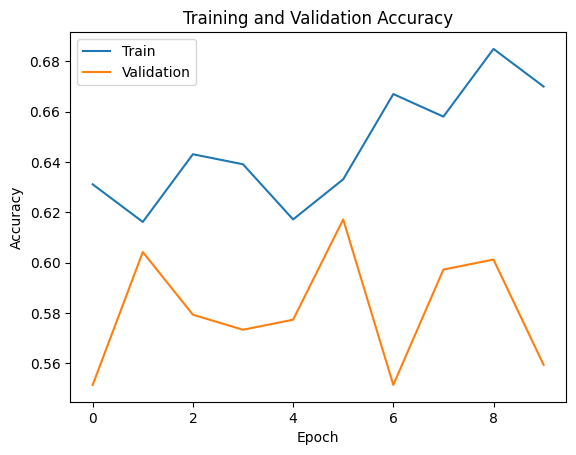

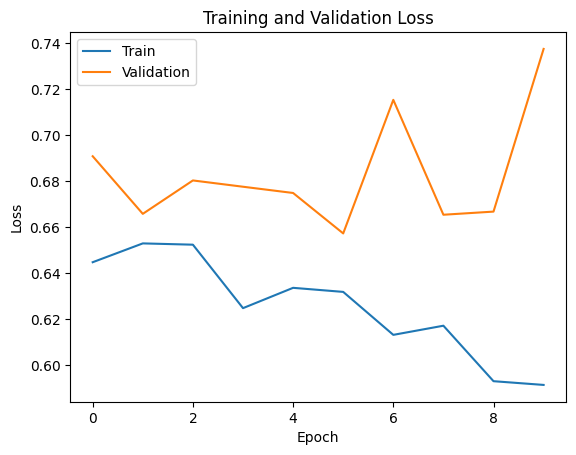

34/34 [==============================] - 4s 120ms/step - loss: 0.7741 - accuracy: 0.5111
Test Loss: 0.7741
Test Accuracy: 0.5111
34/34 [==============================] - 5s 135ms/step


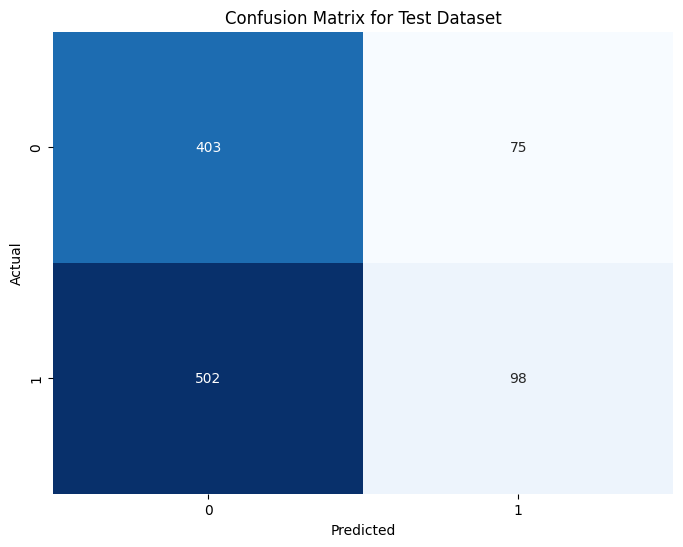

Accuracy: 0.4647
Precision: 0.5665
Recall: 0.1633
F1 Score: 0.2536


In [ ]:
##---------Type the code below this line------------------##
# Train the model and store the history
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Test the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions from the model for the test data
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype('int32')  # Adjust the threshold as needed

# Obtain true labels from the test data generator
y_true = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Dataset')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')




# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



Epoch 1/10
32/32 [==============================] - 19s 529ms/step - loss: 1.1000 - accuracy: 0.5165 - val_loss: 0.6847 - val_accuracy: 0.5713
Epoch 2/10
32/32 [==============================] - 13s 410ms/step - loss: 0.7429 - accuracy: 0.5214 - val_loss: 0.6800 - val_accuracy: 0.5533
Epoch 3/10
32/32 [==============================] - 12s 391ms/step - loss: 0.7225 - accuracy: 0.5434 - val_loss: 0.6911 - val_accuracy: 0.5743
Epoch 4/10
32/32 [==============================] - 14s 423ms/step - loss: 0.6820 - accuracy: 0.5613 - val_loss: 0.6789 - val_accuracy: 0.5862
Epoch 5/10
32/32 [==============================] - 15s 473ms/step - loss: 0.7087 - accuracy: 0.5474 - val_loss: 0.6777 - val_accuracy: 0.5723
Epoch 6/10
32/32 [==============================] - 14s 448ms/step - loss: 0.7446 - accuracy: 0.5414 - val_loss: 0.6794 - val_accuracy: 0.5683
Epoch 7/10
32/32 [==============================] - 15s 449ms/step - loss: 0.7365 - accuracy: 0.5653 - val_loss: 0.8538 - val_accuracy: 0.5085

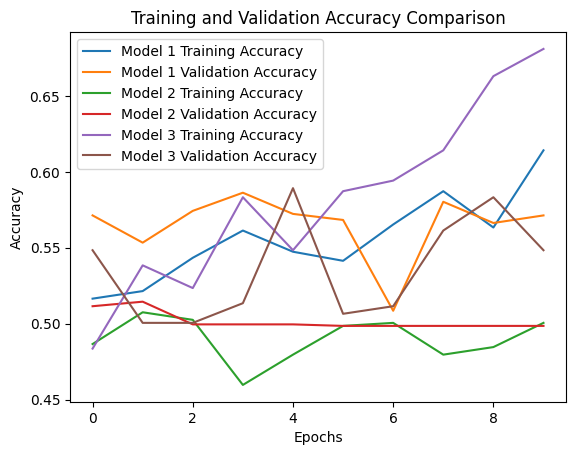

In [ ]:
##---------Type the code below this line------------------##
# Modified architecture with one less layer
'''
model_decrease = Sequential()
model_decrease.add(Flatten(input_shape=(150, 150, 3)))
model_decrease.add(Dense(128, activation='relu'))
model_decrease.add(Dense(1, activation='sigmoid'))

# Modified architecture with one additional layer
model_increase = Sequential()
model_increase.add(Flatten(input_shape=(150, 150, 3)))
model_increase.add(Dense(256, activation='relu'))
model_increase.add(Dense(128, activation='relu'))
model_increase.add(Dense(64, activation='relu'))
model_increase.add(Dense(1, activation='sigmoid'))
'''
import matplotlib.pyplot as plt

# Compile the first model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the first model
history_first = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Compile the second model
model_decrease.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the second model
history_second = model_decrease.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Compile the third model
model_increase.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the third model
history_third = model_increase.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Plotting training and validation accuracy for all three models
plt.plot(history_first.history['accuracy'], label='Model 1 Training Accuracy')
plt.plot(history_first.history['val_accuracy'], label='Model 1 Validation Accuracy')

plt.plot(history_second.history['accuracy'], label='Model 2 Training Accuracy')
plt.plot(history_second.history['val_accuracy'], label='Model 2 Validation Accuracy')

plt.plot(history_third.history['accuracy'], label='Model 3 Training Accuracy')
plt.plot(history_third.history['val_accuracy'], label='Model 3 Validation Accuracy')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



Epoch 1/10
32/32 [==============================] - 16s 470ms/step - loss: 4.0618 - accuracy: 0.5015 - val_loss: 0.6942 - val_accuracy: 0.5663
Epoch 2/10
32/32 [==============================] - 11s 345ms/step - loss: 0.9735 - accuracy: 0.5234 - val_loss: 0.6933 - val_accuracy: 0.5075
Epoch 3/10
32/32 [==============================] - 14s 427ms/step - loss: 0.6951 - accuracy: 0.4945 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 4/10
32/32 [==============================] - 14s 441ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 5/10
32/32 [==============================] - 15s 466ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 6/10
32/32 [==============================] - 14s 443ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 7/10
32/32 [==============================] - 13s 416ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.5005

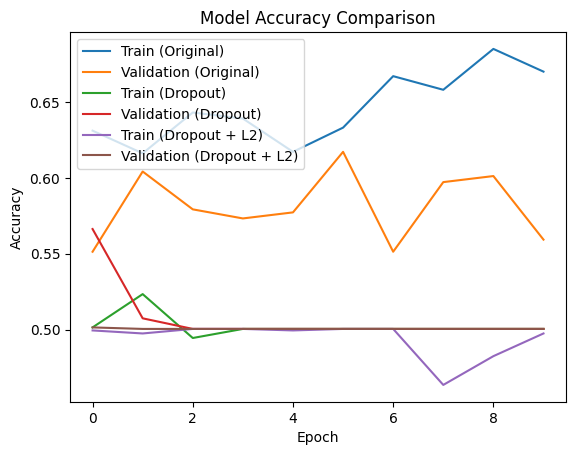

In [ ]:
##---------Type the code below this line------------------##
# Architecture with dropout (ratio 0.25)
model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(150, 150, 3)))
model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dropout(0.25))
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dropout(0.25))
model_dropout.add(Dense(1, activation='sigmoid'))

# Compile model with dropout
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with dropout and store history
history_dropout = model_dropout.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Architecture with dropout and L2 regularization
model_dropout_l2 = Sequential()
model_dropout_l2.add(Flatten(input_shape=(150, 150, 3)))
model_dropout_l2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-04)))
model_dropout_l2.add(Dropout(0.25))
model_dropout_l2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-04)))
model_dropout_l2.add(Dropout(0.25))
model_dropout_l2.add(Dense(1, activation='sigmoid'))

# Compile model with dropout and L2 regularization
model_dropout_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with dropout and L2 regularization and store history
history_dropout_l2 = model_dropout_l2.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Plotting comparison of training and validation accuracy
plt.plot(history.history['accuracy'], label='Train (Original)')
plt.plot(history.history['val_accuracy'], label='Validation (Original)')
plt.plot(history_dropout.history['accuracy'], label='Train (Dropout)')
plt.plot(history_dropout.history['val_accuracy'], label='Validation (Dropout)')
plt.plot(history_dropout_l2.history['accuracy'], label='Train (Dropout + L2)')
plt.plot(history_dropout_l2.history['val_accuracy'], label='Validation (Dropout + L2)')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1003 images belonging to 2 classes.
Found 1003 images belonging to 2 classes.
Found 1078 images belonging to 2 classes.
Total Time Taken for 20 epochs and 5 folds (RMSprop): 416.66 seconds
Total Time Taken for 20 epochs and 5 folds (Adam): 558.16 seconds
Total Time Taken for 20 epochs and 5 folds (SGD): 203.92 seconds


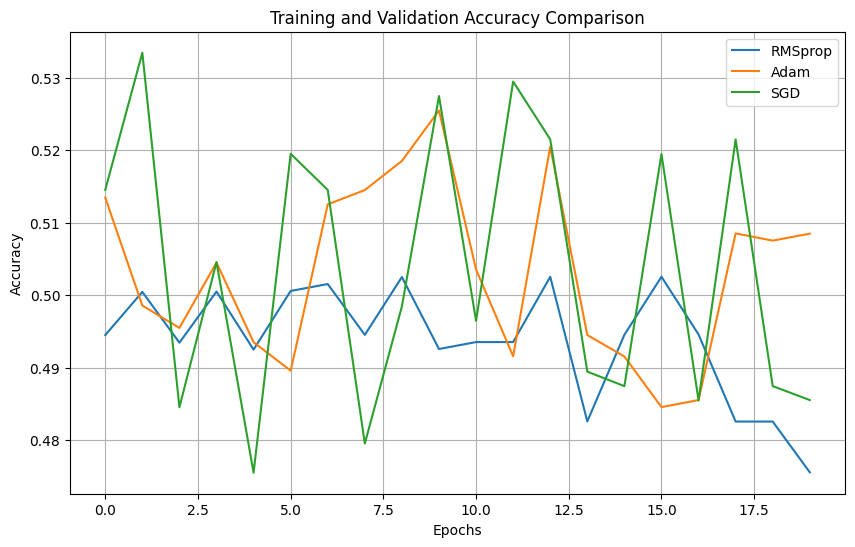

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
import time
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Initialize data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

# Define folder paths
train_folder = '/content/drive/My Drive/data/train'
validation_folder = '/content/drive/My Drive/data/validation'
test_folder = '/content/drive/My Drive/data/test'  # Path for test dataset

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Define the number of folds for cross-validation
num_folds = 5
# Define the number of epochs
epochs = 20

# Initialize KFold
kfold = KFold(n_splits=num_folds, shuffle=True)

# Placeholder to store total time and accuracy history for RMSprop optimizer
total_time_rmsprop = 0.0
accuracy_history_rmsprop = []

# Placeholder to store total time and accuracy history for Adam optimizer
total_time_adam = 0.0
accuracy_history_adam = []

# Placeholder to store total time and accuracy history for SGD optimizer
total_time_sgd = 0.0
accuracy_history_sgd = []

# Loop over each fold for RMSprop optimizer
for fold, (train_idx, val_idx) in enumerate(kfold.split(train_data_array)):
    train_fold_data, train_fold_labels = train_data_array[train_idx], train_labels_array[train_idx]
    val_fold_data, val_fold_labels = train_data_array[val_idx], train_labels_array[val_idx]

    # Create the model for RMSprop
    model_rmsprop = Sequential()
    model_rmsprop.add(Flatten(input_shape=(150, 150, 3)))
    model_rmsprop.add(Dense(128, activation='relu'))
    model_rmsprop.add(Dense(64, activation='relu'))
    model_rmsprop.add(Dense(1, activation='sigmoid'))

    # Compile the model with RMSprop optimizer and hyperparameters
    optimizer_rmsprop = RMSprop(learning_rate=0.001)  # Set your choice of hyperparameters
    model_rmsprop.compile(optimizer=optimizer_rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model using RMSprop and measure time taken
    start_time = time.time()
    history_rmsprop = model_rmsprop.fit(train_fold_data, train_fold_labels, epochs=epochs, validation_data=(val_fold_data, val_fold_labels), verbose=0)
    end_time = time.time()

    fold_time_rmsprop = end_time - start_time
    total_time_rmsprop += fold_time_rmsprop
    accuracy_history_rmsprop.append(history_rmsprop.history['val_accuracy'])

# Loop over each fold for Adam optimizer
for fold, (train_idx, val_idx) in enumerate(kfold.split(train_data_array)):
    train_fold_data, train_fold_labels = train_data_array[train_idx], train_labels_array[train_idx]
    val_fold_data, val_fold_labels = train_data_array[val_idx], train_labels_array[val_idx]

    # Create the model for Adam
    model_adam = Sequential()
    model_adam.add(Flatten(input_shape=(150, 150, 3)))
    model_adam.add(Dense(128, activation='relu'))
    model_adam.add(Dense(64, activation='relu'))
    model_adam.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer and hyperparameters
    optimizer_adam = Adam(learning_rate=0.001)  # Set your choice of hyperparameters
    model_adam.compile(optimizer=optimizer_adam, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model using Adam and measure time taken
    start_time = time.time()
    history_adam = model_adam.fit(train_fold_data, train_fold_labels, epochs=epochs, validation_data=(val_fold_data, val_fold_labels), verbose=0)
    end_time = time.time()

    fold_time_adam = end_time - start_time
    total_time_adam += fold_time_adam
    accuracy_history_adam.append(history_adam.history['val_accuracy'])

# Loop over each fold for SGD optimizer
for fold, (train_idx, val_idx) in enumerate(kfold.split(train_data_array)):
    train_fold_data, train_fold_labels = train_data_array[train_idx], train_labels_array[train_idx]
    val_fold_data, val_fold_labels = train_data_array[val_idx], train_labels_array[val_idx]

    # Create the model for SGD
    model_sgd = Sequential()
    model_sgd.add(Flatten(input_shape=(150, 150, 3)))
    model_sgd.add(Dense(128, activation='relu'))
    model_sgd.add(Dense(64, activation='relu'))
    model_sgd.add(Dense(1, activation='sigmoid'))

    # Compile the model with SGD optimizer and hyperparameters
    optimizer_sgd = SGD(learning_rate=0.01)  # Set your choice of hyperparameters
    model_sgd.compile(optimizer=optimizer_sgd, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model using SGD and measure time taken
    start_time = time.time()
    history_sgd = model_sgd.fit(train_fold_data, train_fold_labels, epochs=epochs, validation_data=(val_fold_data, val_fold_labels), verbose=0)
    end_time = time.time()

    fold_time_sgd = end_time - start_time
    total_time_sgd += fold_time_sgd
    accuracy_history_sgd.append(history_sgd.history['val_accuracy'])

# Calculate and display total time taken for all folds for each optimizer
print(f"Total Time Taken for {epochs} epochs and {num_folds} folds (RMSprop): {total_time_rmsprop:.2f} seconds")
print(f"Total Time Taken for {epochs} epochs and {num_folds} folds (Adam): {total_time_adam:.2f} seconds")
print(f"Total Time Taken for {epochs} epochs and {num_folds} folds (SGD): {total_time_sgd:.2f} seconds")

# Plotting comparison of training and validation accuracy for each optimizer
plt.figure(figsize=(10, 6))
plt.plot(np.mean(accuracy_history_rmsprop, axis=0), label='RMSprop')
plt.plot(np.mean(accuracy_history_adam, axis=0), label='Adam')
plt.plot(np.mean(accuracy_history_sgd, axis=0), label='SGD')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [ ]:
##---------Type the code below this line------------------##

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck